In [1]:
import os
import json

import torch
from datasets import dataset_factory
from stnn import SaptioTemporalNN
from utils import rmse
from datasets import dataset_factory
from matplotlib import colors
import matplotlib.pyplot as plt
import graph_utils as gu

import os
import re
cwd = os.getcwd()
print(cwd)
sdirects = gu.get_directories('comp')


/Users/eamonbracht/Desktop/deforestation/Mich_Data/defor_stnn
{'1km_2018': ['1km_stnn_r_1', '1km_stnn_r_2', '1km_stnn_r_3', '1km_stnn_r_4', '1km_stnn_r_5', '1km_stnn_r_6', '1km_stnn_r_7', '1km_stnn_r_8', '1km_stnn_r_9', '1km_stnn_r_10', '1km_stnn_r_111', '1km_stnn_r_1112', '1km_stnn_r_11113', '1km_stnn_r_111114', '1km_stnn_r_1111115', '1km_stnn_r_11111116', '1km_stnn_r_111111117', '1km_stnn_r_1111111118', '1km_stnn_r_11111111119', '1km_stnn_r_111111111120', '1km_stnn_r_1111111111221', '1km_stnn_r_11111111112222', '1km_stnn_r_111111111122223'], '2km_2018': ['2km_stnn_r_1', '2km_stnn_r_2', '2km_stnn_r_3', '2km_stnn_r_4', '2km_stnn_r_5', '2km_stnn_r_6', '2km_stnn_r_7', '2km_stnn_r_8', '2km_stnn_r_9', '2km_stnn_r_10', '2km_stnn_r_111', '2km_stnn_r_1112'], '3km_2018': ['3km_stnn_r_1', '3km_stnn_r_2', '3km_stnn_r_3', '3km_stnn_r_4', '3km_stnn_r_5', '3km_stnn_r_6'], '6km_2018': ['6km_stnn_r_1', '6km_stnn_r_2']}


In [80]:
datadir = 'data'
dataset = '3km_2018'
shape = [100, 147]
_, (train_data, test_data), _ = dataset_factory(datadir, dataset, shape[0], shape[1])
print(test_data.shape)
print(train_data.shape)

100 147
(19, 14700)


/Users/eamonbracht/Desktop/deforestation/Mich_Data/defor_stnn/data_utils.py:257: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tensor = np.stack(granular_relations.values(), 1)


['all'] Construction Successful
tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.]]) torch.Size([14700, 1, 14700])
data
torch.Size([4, 14700, 1])
torch.Size([15, 14700, 1])


In [81]:
outputdir = 'test/comp'
name = '3km_stnn_r_'
exps = [name+str(x) for x in range(1,7)]
models = {}
tsize = 0
for exp in exps:
    print(exp)
    with open(os.path.join(outputdir, exp, 'config.json'), 'r') as f:
        config = json.load(f)
    setup, (train_data, test_data), relations = dataset_factory(datadir, dataset, config['tsize'], config['tsize'], config['khop'])
    tsize = config['tsize']
    model = SaptioTemporalNN(relations, config['tsize']*config['tsize'], config['nt_train'], 1, config['nz'], config['mode'], config['nhid'],
                             config['nlayers'], config['dropout_f'], config['dropout_d'],
                             config['activation'], config['periode'])
    state_dict = torch.load(os.path.join(outputdir, exp, 'model.pt'), map_location=lambda storage, loc: storage)
    model.load_state_dict(state_dict)
    models[exp] = model

3km_stnn_r_1
50 50
(19, 14700)
['all'] Construction Successful 'east', 'west', 'northeast', 'northwest', 'southeast', 'southwest'] relation


/Users/eamonbracht/Desktop/deforestation/Mich_Data/defor_stnn/data_utils.py:257: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tensor = np.stack(granular_relations.values(), 1)


tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.]]) torch.Size([2500, 1, 2500])
data
---------
|nt   16|
---------
|nx   2500|
---------
|nz   1|
---------
torch.Size([2500, 2, 2500])
size of relation torch.Size([2500, 2, 2500])
num relation 2
nt 16 nx 2500 nz 1 nr 2 mode refine
3km_stnn_r_2
50 50
(19, 14700)
['all'] Construction Successful 'east', 'west', 'northeast', 'northwest', 'southeast', 'southwest'] relation
tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 

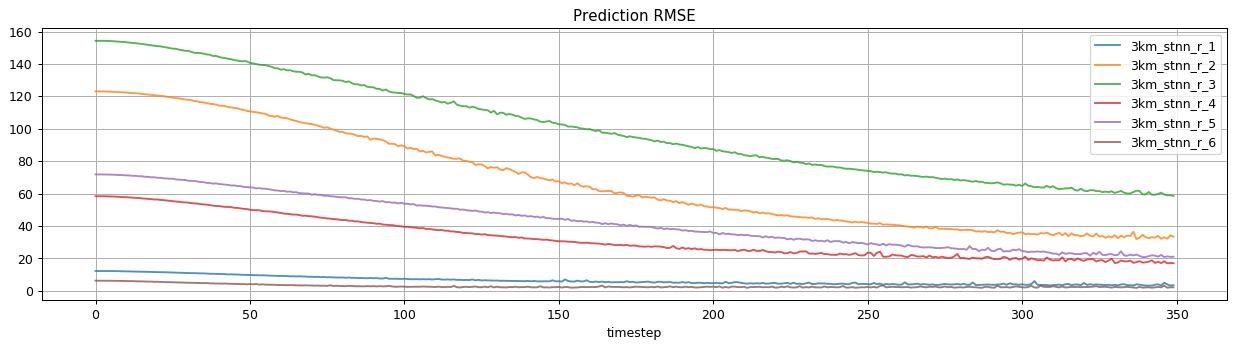

In [83]:
plt.figure('Test plots', figsize=(17, 4), dpi=90)
for exp in exps:
    with open(os.path.join(outputdir, exp, 'logs.json'), 'r') as f:
        logs = json.load(f)
#     print(len(logs['test_epoch.rmse']))
    plt.plot(range(350), logs['test_epoch.rmse'], label=exp, alpha=0.8)

plt.grid()
plt.title('Prediction RMSE')
plt.xlabel('timestep')
plt.legend()

In [76]:
import numpy as np
# def rmse(x_pred, x_target, reduce=True):
#     if reduce:
#         return x_pred.sub(x_target).pow(2).sum(-1).sqrt().mean().item()
#     return x_pred.sub(x_target).pow(2).sum(2).sqrt().mean(1).squeeze()
predictions = {}
for count, exp in enumerate(exps):
    model = models[exp]
    model.eval()
    with torch.no_grad():
        prediction, _ = model.generate(3)
        predictions[exp] = prediction
#     print('RMSE {}:\t'.format(exp), mse)
comp = np.zeros((3, 100, 150))
tsize = 50
for count, [key, i] in enumerate(predictions.items()):
    temp = np.asarray(i)
    print(key)
    temp = temp.reshape(3, 50, 50)
    idx = int(count/2.)
    print(idx)
    if count % 2 == 0:
        comp[:, :50, tsize*idx:tsize*(idx+1)] += temp
    else:
        comp[:, 50:, tsize*idx:tsize*(idx+1)] += temp
compilation = torch.from_numpy(np.expand_dims(comp.reshape(3, -1), axis = 2))
print('RMSE {}:/t'.format(rmse(compilation, test_data)))

3km_stnn_r_1
0
3km_stnn_r_2
0
3km_stnn_r_3
1
3km_stnn_r_4
1
3km_stnn_r_5
2
3km_stnn_r_6
2


RuntimeError: The size of tensor a (15000) must match the size of tensor b (14700) at non-singleton dimension 1

RuntimeError: The size of tensor a (14700) must match the size of tensor b (2500) at non-singleton dimension 1

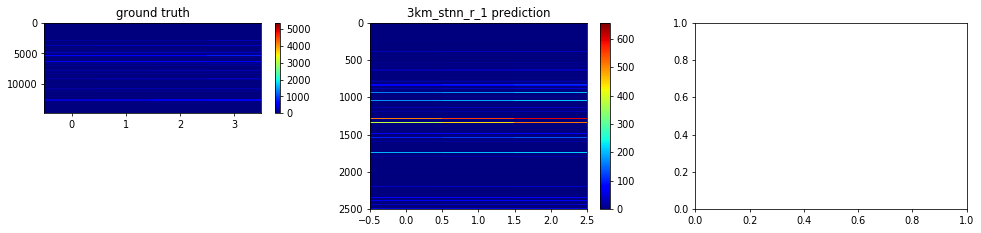

In [7]:
plt.figure('Results', figsize=(17, 12), dpi=70)

plt.subplot(6, 3, 1)
plt.imshow(test_data.squeeze().numpy().T, aspect='auto', cmap='jet')
plt.colorbar()
plt.title('ground truth')

for i, exp in enumerate(exps):
    plt.subplot(3, 3, i * 3 + 2 + i // 3)
    plt.imshow(predictions[exp].squeeze().numpy().T, aspect='auto', cmap='jet')
    plt.colorbar()
    plt.title('{} prediction'.format(exp))

    plt.subplot(3, 3, i * 3 + 3 + i // 3)
    plt.imshow(test_data.sub(predictions[exp]).abs().squeeze().numpy().T, aspect='auto')
    plt.colorbar()
    plt.title('{} absolute error'.format(exp))

In [44]:
# plt.figure('Test plots', figsize=(17, 4), dpi=90)
# for exp in exps:
#     with open(os.path.join(outputdir, exp, 'logs.json'), 'r') as f:
#         logs = json.load(f)

#     plt.plot([logs['test_epoch.ts.{}.rmse'.format(ts)][-1] for ts in range(100)], label=exp, alpha=0.8)

# plt.grid()
# plt.title('Prediction RMSE')
# plt.xlabel('timestep')
# plt.legend()

In [78]:
from scipy.misc import imresize

plt.figure('Relations', figsize=(17, 4), dpi=70)

m = models['3km_stnn_2']
rel_r = m.get_relations().detach().numpy()
full = np.sum(rel_r, axis = 1)
# full = imresize(full, .03)
plt.imshow(full[:200, :200], aspect='equal')
plt.title('stnn_r')
plt.colorbar()
plt.show()
    

KeyError: '3km_stnn_2'

<Figure size 1190x280 with 0 Axes>

In [155]:
values = {}
directions = ["north", "south", "east", "west", "northeast", "northwest", "southeast", "southwest"]
empty_rels = np.asarray(du.make_relation(["all"], shape, False, False))
relation_indicies = {}
for i in directions:
    relation_indicies[i] = np.array(
        np.nonzero(
            np.asarray(du.make_relation([i], shape, False, False)).squeeze(1))).T
lengths = {}  
for rel in range(9):
    i = rel_r[:, rel, :]
    lengths[rel] = {}
    points = np.array(np.nonzero(i)).T
    for key, val in relation_indicies.items():
        truth = tuple(map(tuple, val))
        test = tuple(map(tuple, points))
        size = len((set(test) - set(truth)))
        lengths[rel][key] = size


NameError: name 'du' is not defined

In [320]:
min_rels = rel_r[:, 1:, :]
print(min_rels.shape)
fmt = '{:<12}{:<20}{:<20}{}'
num_dir = {}
dir_counts = {}
for count, val in enumerate(directions):
    num_dir[count] = val
    dir_counts[val] = 0
dir_counts["none"] = 0    
final_rel = []
for count, val in enumerate(min_rels):
    indec = np.array(np.nonzero(val)).T
    max_vals = []
    for rel, index in enumerate(indec):
        max_vals.append(min_rels[count, index[0], index[1]])
    try:
        max_dir = num_dir[np.argmax(max_vals)]
        dir_counts[max_dir] +=1
        final_rel.append(max_dir)
    except:
        max_dir = np.nan
        dir_counts["none"] +=1
        final_rel.append(np.nan)
#     print(fmt.format(count, str(indec.shape),  max_dir, 0))
pretty(dir_counts)


(3700, 8, 3700)
north
	2420
south
	733
east
	321
west
	126
northeast
	59
northwest
	23
southeast
	3
southwest
	3
none
	12


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


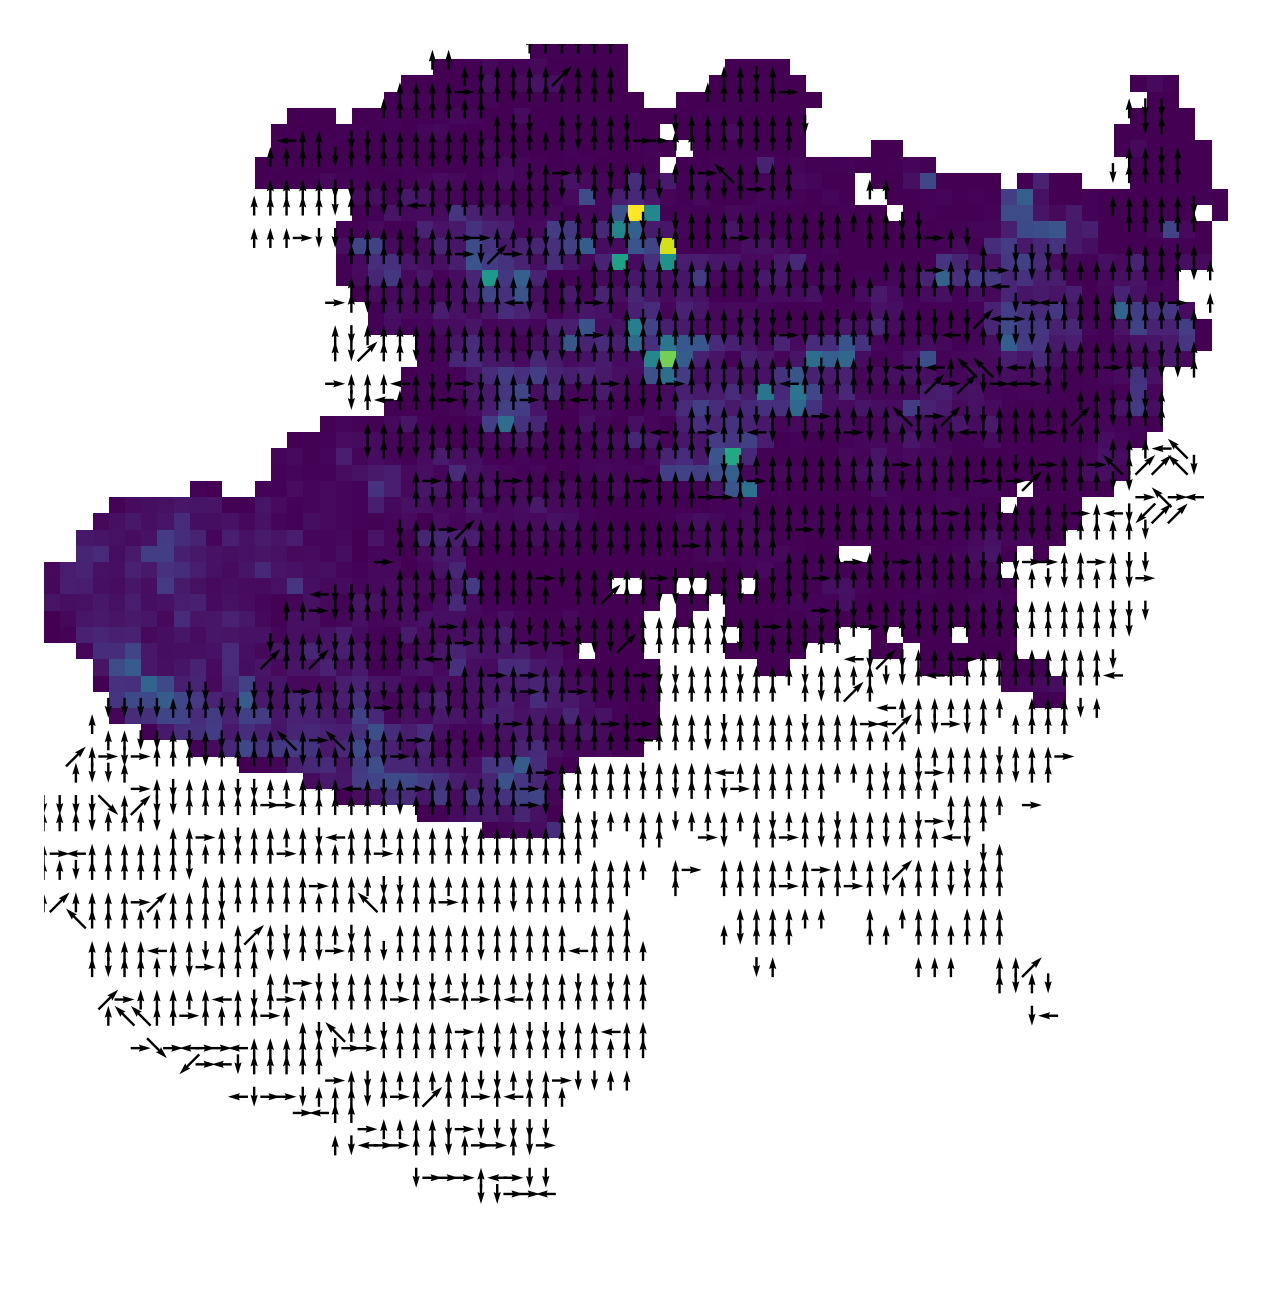

In [492]:
import math
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
fig, ax = plt.subplots(dpi = 400)
# ax.set_ylim((50, 0))
# ax.set_xlim((0, 74))
plt.grid('off')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
for exclude in flatten_exc:
    final_rel[exclude.item()] = "none"
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.imshow(test_exp[0])

for count, r in enumerate(final_rel):
    i, j = int(count/shape[0])-.5, count%shape[1]-.5
    lw = .2
    quiv_len = .5
    cf = 2**.5/2*len
#     if j > 10:
#         break
#     if r == "north":
#         ax.quiver(j, i, 0, quiv_len, width = .002, scale = 10, scale_units = 'inches', pivot = 'mid')

#     elif r == "south":
#         ax.quiver(j, i, 0, -1*quiv_len, width = .002, scale = 10, scale_units = 'inches', pivot = 'mid')

#     elif r == "east":
#         ax.quiver(j, i, quiv_len, 0, width = .002, scale = 10, scale_units = 'inches', pivot = 'mid')

#     elif r == "west":
#         ax.quiver(j, i, -1*quiv_len, 0, width = .002, scale = 10, scale_units = 'inches', pivot = 'mid')

#     elif r == "northeast":
#         ax.quiver(j, i, cf, cf, width = .002, scale = 10, scale_units = 'inches', pivot = 'mid')

#     elif r == "northwest":
#         ax.quiver(j, i, -1*cf, cf, width = .002, scale = 10, scale_units = 'inches', pivot = 'mid')

#     elif r == "southeast":
#         ax.quiver(j, i, cf, -1*cf, width = .002, scale = 10, scale_units = 'inches', pivot = 'mid')

#     elif r == "southwest":
#         ax.quiver(j, i, -1*cf, -1*cf, width = .002, scale = 10, scale_units = 'inches', pivot = 'mid')
#     else:
#         pass


plt.show()


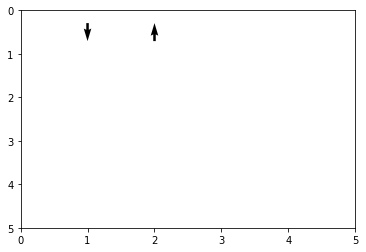

In [466]:
fig, ax = plt.subplots()
ax.set_xlim((0, 5))
ax.set_ylim((5, 0))
ax.quiver(1, .5, 0, -.5, scale = 2, scale_units = "inches", pivot = 'mid')
ax.quiver(2, .5, 0, .5, scale = 2, scale_units = "inches", pivot = 'mid')

plt.show()

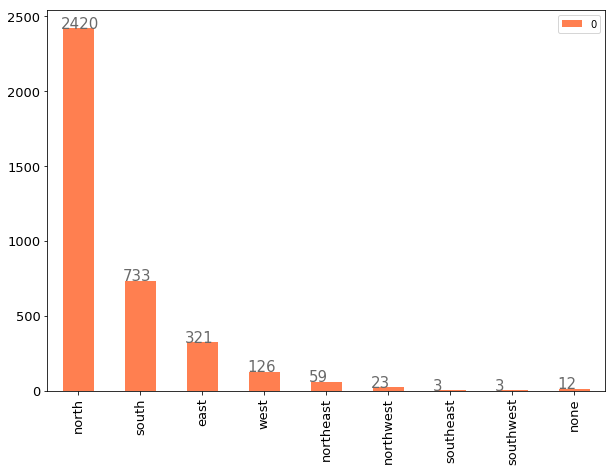

In [252]:
import pandas as pd
data = pd.DataFrame.from_dict(dir_counts, orient='index')
ax = data.plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
# ax.set_title("Where were the battles fought?", fontsize=18)
# ax.set_ylabel("Number of Battles", fontsize=18);
# ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()))), fontsize=15,
                color='dimgrey')


torch.Size([4, 14700, 1])


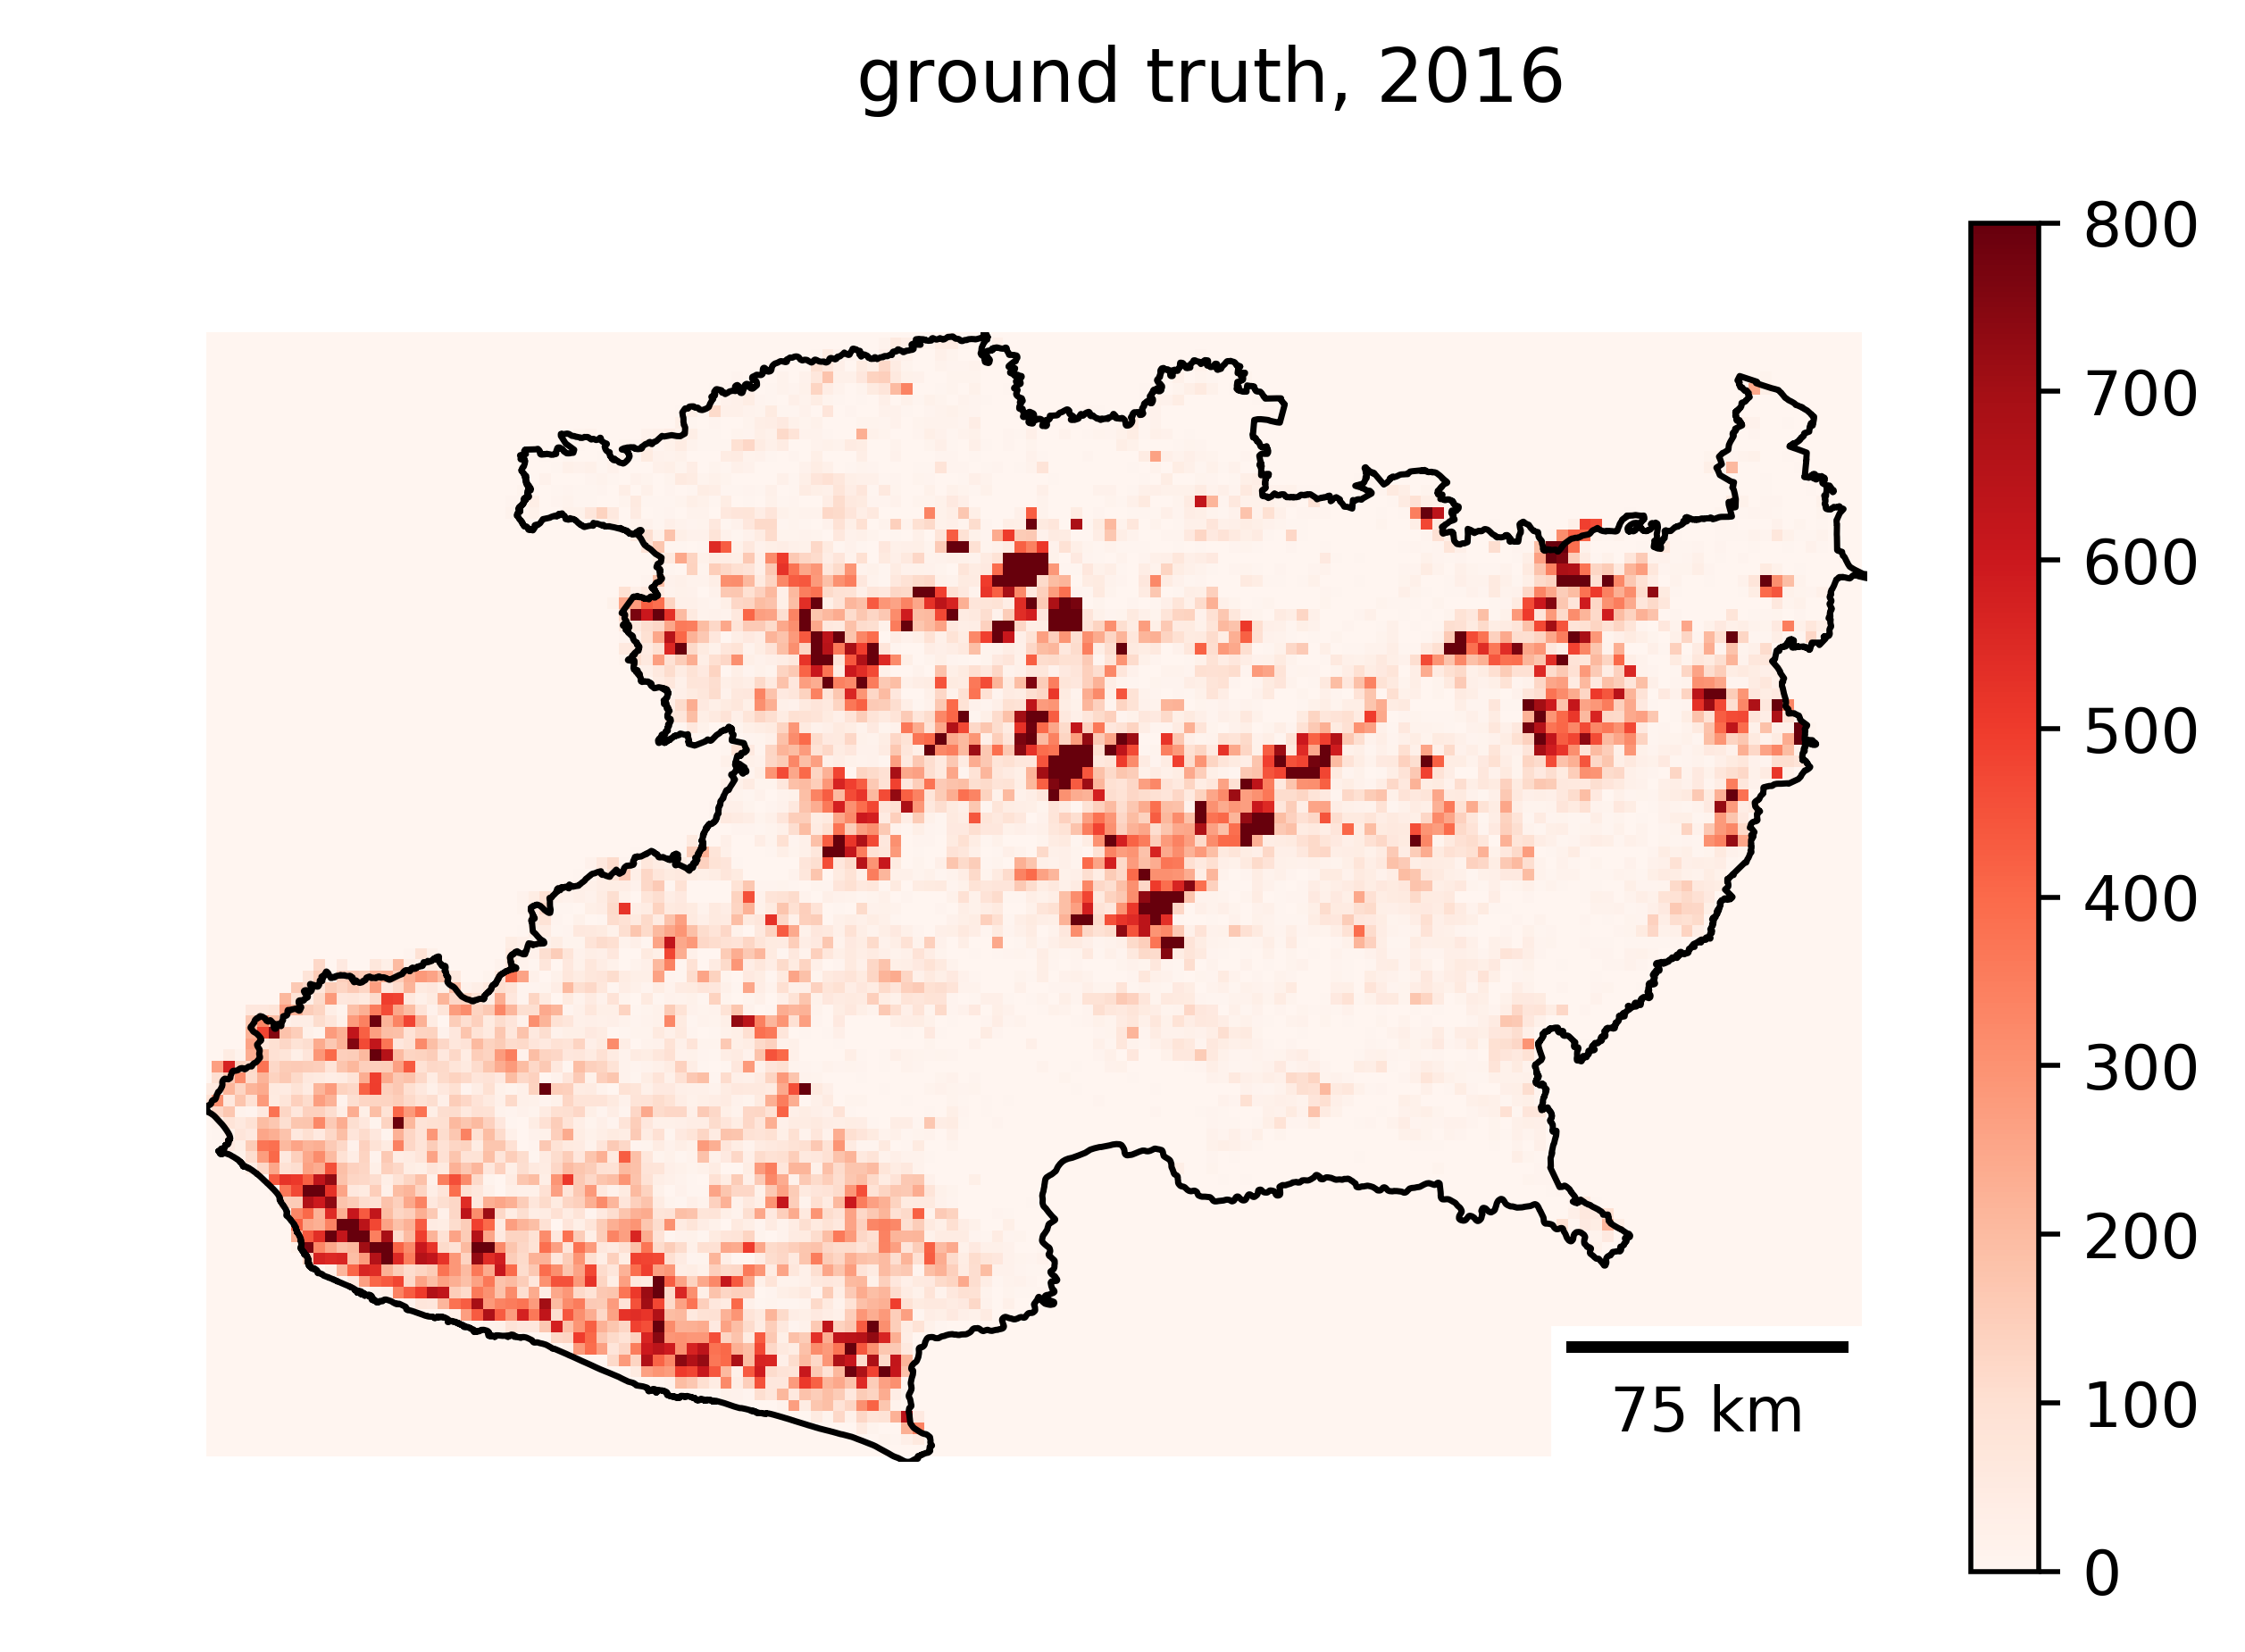

In [70]:
import graph_utils as gu
print(test_data.shape)
experiment_graph_data = test_data.reshape(4, 100, 147)[1]
experiment_graph_data[experiment_graph_data > 800] = 800
gu.graph_fancy(experiment_graph_data, 3000, 2016, "ground truth", False)


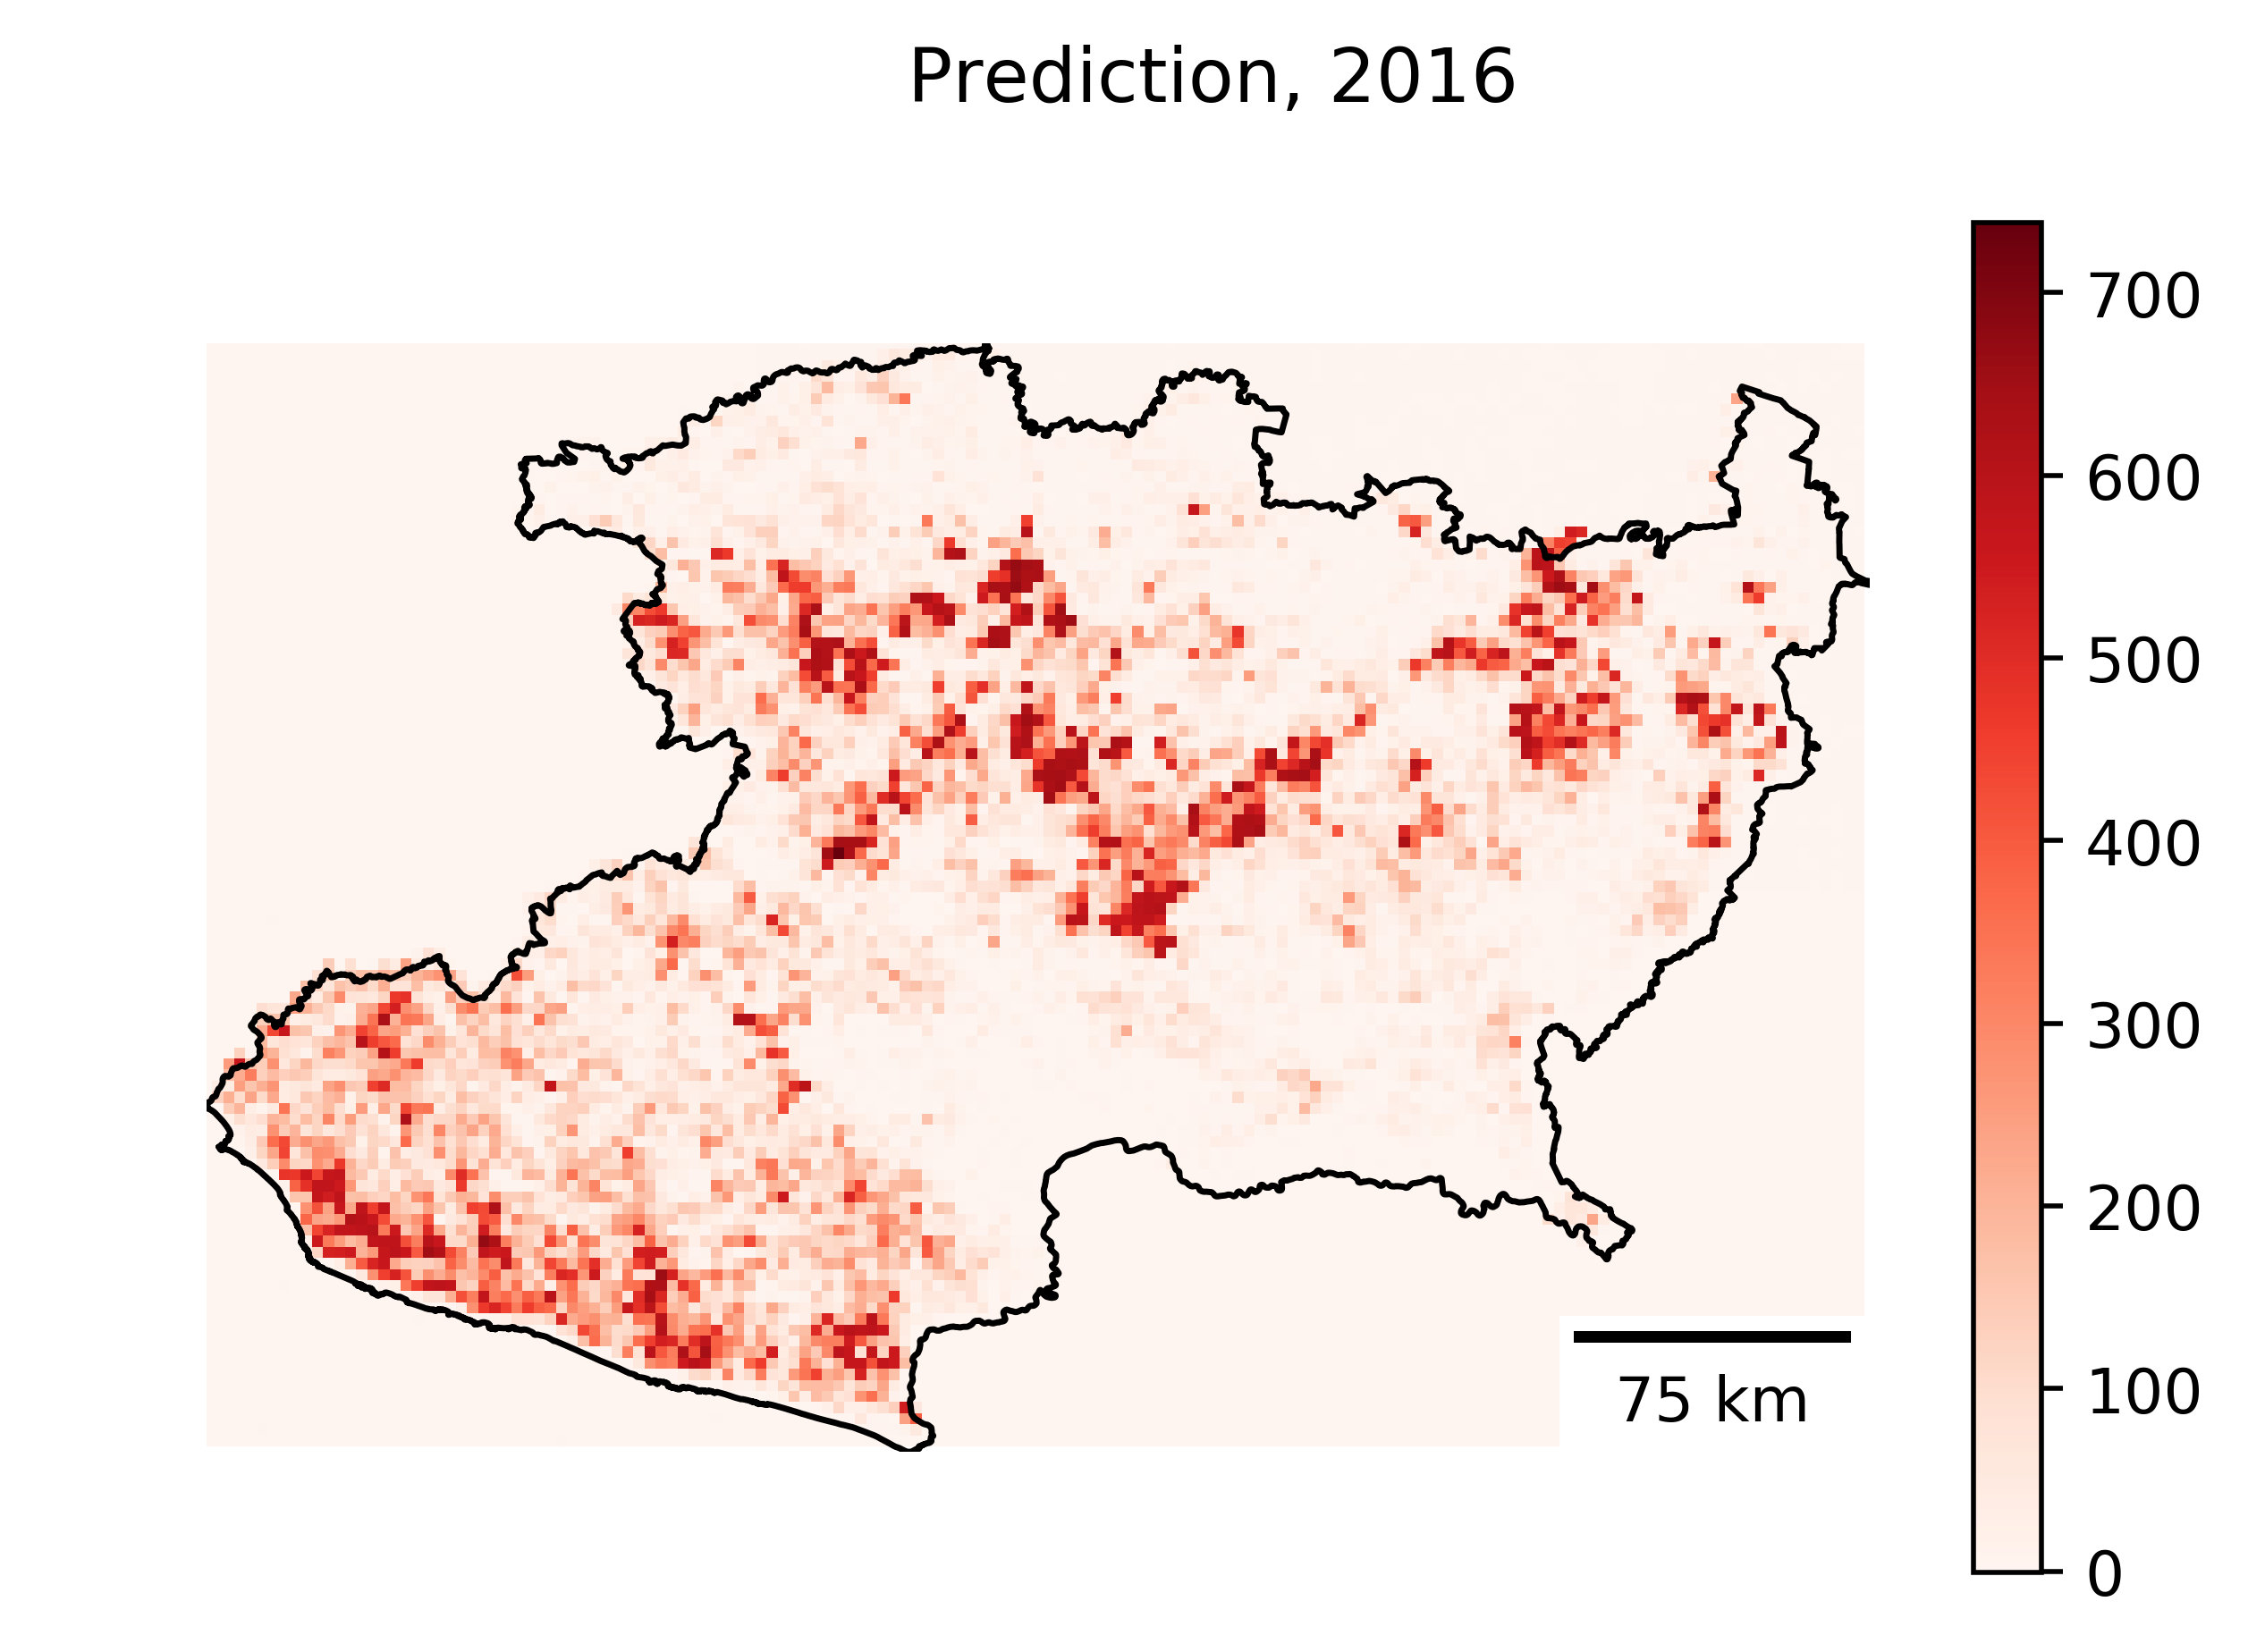

In [77]:
import numpy as np
data_1 = np.asarray(compilation)
data_2 = data_1.reshape(3, 100, 150)[0]
gu.graph_fancy(data_2, 3000, 2016, "Prediction", False)

In [1]:
from raster import Raster
import data_utils as du
import numpy as np
import sys
import matplotlib.pyplot as plt
import torch
import os


# du.import_json("../data/big_area")
# main test harness
defor = Raster('../data/clipped_2018_2.tif', [])
array = defor.read()
print(array.shape)
years = du.make_dict(defor, "test", 18)
years = du.dictionary_to_array(years, False)

<open DatasetReader name='../data/clipped_2018_2.tif' mode='r'> 
../data/clipped_2018_2.tif
Attributes: 1

Width: 14699
Height: 9918
(9918, 14699)
0
removing -1's
0
Converting dictionary to array#################################   ]	18/19


/Users/eamonbracht/Desktop/deforestation/Mich_Data/defor_stnn/data_utils.py:121: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tensor = np.stack(data.values(), 0)


Array success (19, 9918, 14699)


In [6]:
ks = 100
# grid_test = np.copy(years[1])
# grid_test[grid_test == -1] = 0
out = du.grid_area(years, ks, True, True)


pixel resolution: 3km
converting 9918   ->   10000
converting 14699   ->   14700
(19, 10000, 14700)
(19, 100, 147)


In [2]:
sizes = [200, 100, 75, 50]
for ks in sizes:
    out = du.grid_area(years, ks, True, True)


pixel resolution: 6km
converting 9918   ->   10000
converting 14699   ->   14800
(19, 10000, 14800)
(19, 50, 74)
pixel resolution: 3km
converting 9918   ->   10000
converting 14699   ->   14700
(19, 10000, 14700)
(19, 100, 147)
pixel resolution: 2km
converting 9918   ->   9975
converting 14699   ->   14700
(19, 9975, 14700)
(19, 133, 196)
pixel resolution: 1km
converting 9918   ->   9950
converting 14699   ->   14700
(19, 9950, 14700)
(19, 199, 294)


In [3]:
print(out[0, 0, 0])

0.0


In [ ]:
flatten_exc = np.argwhere(out.reshape(-1) == 0)
print(flatten_exc[0])
excluded_vals = np.argwhere(out == 0)
test_exp = np.expand_dims(experiment_graph_data, axis = 0)
# for i in excluded_vals:
print(excluded_vals.shape)
print(excluded_vals[10])
for i in excluded_vals:
    test_exp[i[0], i[1], i[2]] = np.nan
print(test_exp.shape)

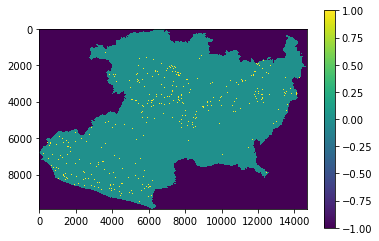

-1


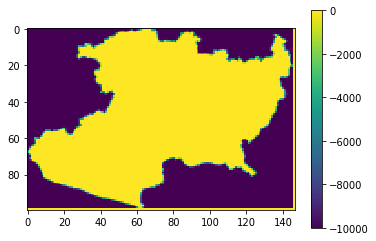

In [4]:
# np.savetxt("2018_fullres.csv", a)
plt.figure(1)
plt.imshow(years[17])
plt.colorbar()
plt.show()
print(years[0, 0, 0])
plt.figure(2)
plt.imshow(out[0])
plt.colorbar()
plt.show()

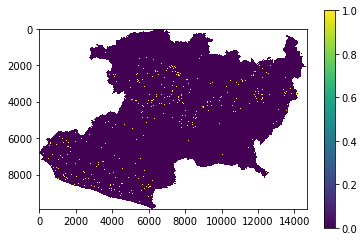

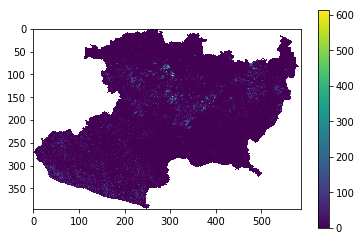

In [27]:
temp = np.copy(years[17])
temp = np.array(temp, dtype = float)
temp[temp == -1] = np.nan
plt.figure(1)
plt.imshow(temp)
plt.colorbar()
plt.show()
temp_out = np.copy(out[0])
temp_out[temp_out < 0] = np.nan
plt.figure(2)
plt.imshow(temp_out)
plt.colorbar()
plt.show()

In [2]:
ks = 25
out = du.grid_area(years, ks, False, True)

pixel resolution: 0km
converting 9918   ->   9925
converting 14699   ->   14700
(19, 9925, 14700)
(19, 397, 588)
array contains Nan's


0    0	       0.0
100  100	     0.256
200  200	     4.096
300  300	    20.736
400  400	    65.536
500  500	     160.0
600  600	   331.776
700  700	   614.656
800  800	  1048.576


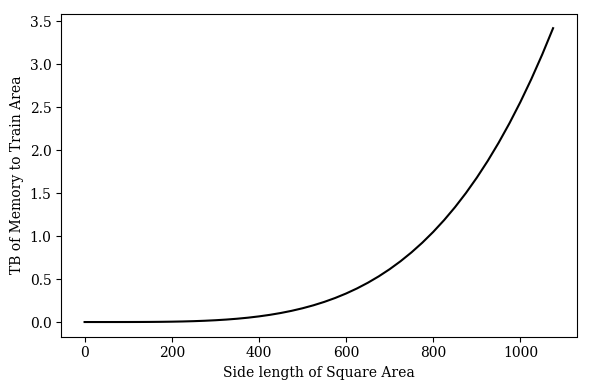

In [22]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0, 1000+100, 25)
y = x**4
y = [i * 32/(1.25e13) for i in y]
plt.figure(dpi = 100)
plt.rc('font', family='serif')
plt.ylabel("TB of Memory to Train Area")
plt.xlabel("Side length of Square Area")
# plt.title("Title")
plt.plot(x, y, color='k', ls='solid')
plt.tight_layout()
plt.savefig("../figs/memory_req.png")
form = "{}{:5}\t{:10}"
val = np.arange(0, 35, 4)
for i in val:
    print(form.format(i*25, (x[i]), (y[i])*1e3))
# print(y[2]*1e3)

In [23]:
print((15000*9000)**2 * 32/(1.25e13))


46656.0
